In [1]:
!pip install yfinance

In [10]:
import yfinance as yf  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
def get_ticker_data(ticker, start, end, interval):
    
    # import libaries
    import yfinance as yf  
    import matplotlib.pyplot as plt
    import pandas as pd
    
    # download data using yfinance libary
    df = yf.download(tickers=ticker,start=start,end=end,interval=interval)
    
    # add in column showing price % change from start date 
    df['Percent_Change'] = [(df['Close'][i] - df['Open'][i]) / df['Open'][i] * 100 for i in range(len(df['Open']))]
    df['Change_Close_Less_Open'] = [df['Close'][i] - df['Open'][i] for i in range(len(df['Open']))]
    return df

In [4]:
df_btc = get_ticker_data(ticker='BTC-USD',start='2020-01-01',end='2021-04-30',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [5]:
df_doge = get_ticker_data(ticker='DOGE-USD',start='2020-01-01',end='2021-04-30',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [6]:
df_reddit_doge = pd.read_csv('reddit_pmaw_output_dogecoin_subreddit.1.1.21-4.30.21.csv')

df_reddit_doge.head()

C:\Users\T\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (79,82,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,author_flair_text_color,gallery_data,is_gallery,author_flair_template_id,poll_data,author_cakeday,banned_by,suggested_sort,gilded,top_awarded_type
0,[],False,neobz42,NaN,[],NaN,text,t2_99hi0,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Randy-Candy,NaN,[],NaN,text,t2_338fg1xq,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,hshdhdjejjee,NaN,[],NaN,text,t2_5wqatt75,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,Zealousideal_Fix7776,NaN,[],NaN,text,t2_6qe2ct2w,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,swirlybuns,NaN,[],NaN,text,t2_3icwxuh,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_reddit_doge = df_reddit_doge[['subreddit', 'created_utc', 'subreddit_subscribers', 'num_comments']]

df_reddit_doge.head()

,subreddit,created_utc,subreddit_subscribers,num_comments
0,dogecoin,2021-01-13 05:10:16,183938,33
1,dogecoin,2021-01-13 04:57:42,183939,0
2,dogecoin,2021-01-13 04:43:22,183935,20
3,dogecoin,2021-01-13 04:42:17,183935,0
4,dogecoin,2021-01-13 04:13:49,183920,13


In [15]:
# remove bad rows

df_reddit_doge = df_reddit_doge[df_reddit_doge['subreddit'] == 'dogecoin']

df_reddit_doge.head()

,subreddit,created_utc,subreddit_subscribers,num_comments
0,dogecoin,2021-01-13 05:10:16,183938,33
1,dogecoin,2021-01-13 04:57:42,183939,0
2,dogecoin,2021-01-13 04:43:22,183935,20
3,dogecoin,2021-01-13 04:42:17,183935,0
4,dogecoin,2021-01-13 04:13:49,183920,13


In [21]:
# check value in subreddit column

df_reddit_doge['subreddit'].value_counts()

dogecoin    441767
Name: subreddit, dtype: int64

In [22]:
# convert epoch time to datetime and date

df_reddit_doge["created_utc"] = pd.to_datetime(df_reddit_doge["created_utc"],unit='s')
df_reddit_doge["created_date_utc"] = df_reddit_doge["created_utc"].dt.date

df_reddit_doge.head()


,subreddit,created_utc,subreddit_subscribers,num_comments,created_date_utc
0,dogecoin,2021-01-13 05:10:16,183938,33,2021-01-13
1,dogecoin,2021-01-13 04:57:42,183939,0,2021-01-13
2,dogecoin,2021-01-13 04:43:22,183935,20,2021-01-13
3,dogecoin,2021-01-13 04:42:17,183935,0,2021-01-13
4,dogecoin,2021-01-13 04:13:49,183920,13,2021-01-13


In [35]:
# sum rows by date, sum comments by date, and average subscribers by date

doge_comments_sum = df_reddit_doge.groupby('created_date_utc').sum()['num_comments']
doge_subscribers_avg = df_reddit_doge.groupby('created_date_utc').mean()['subreddit_subscribers']
doge_submission_count = df_reddit_doge.groupby('created_date_utc').count()['subreddit']


df_reddit_doge_summary = pd.DataFrame({'submissions': doge_submission_count, 
                                       'comments': doge_comments_sum, 
                                       'subscribers': doge_subscribers_avg
                                      })

df_reddit_doge_summary.head()

,submissions,comments,subscribers
created_date_utc,,,
2021-01-01,82,674,172166.853659
2021-01-02,1057,6887,173718.056764
2021-01-03,710,4528,176679.688732
2021-01-04,466,2930,178361.748927
2021-01-05,295,2509,179209.359322


In [36]:
df_combined_prices = df_doge.join(df_btc, how='inner', lsuffix='_doge', rsuffix='_btc')

The correlation is 0.01 with R-square value of 0.0


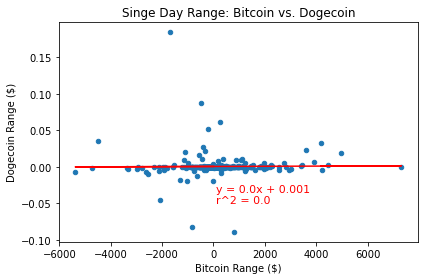

In [38]:
import scipy.stats as st

# Calculate the correlation coefficient and linear regression model 

btc = df_combined_prices['Change_Close_Less_Open_btc']
doge = df_combined_prices['Change_Close_Less_Open_doge']

# calculate and plot the regression line on the scatter plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(btc, doge)
regress_values = btc * slope + intercept
regress_eq = (f'''y = {str(round(slope, 3))}x + {str(round(intercept, 3))}
r^2 = {round(rvalue**2,3)}''')

# format plot
fig, ax = plt.subplots()
df_combined_prices.plot(kind='scatter', 
                 ax=ax, 
                 x='Change_Close_Less_Open_btc', 
                 y='Change_Close_Less_Open_doge'
                )

# plot trend linear regression line and annotate

ax.plot(btc, regress_values, color = 'r')
ax.annotate(regress_eq, (100,-0.05), color = 'r', fontsize=11)

ax.set(title='Singe Day Range: Bitcoin vs. Dogecoin',
       xlabel = 'Bitcoin Range ($)',
       ylabel = 'Dogecoin Range ($)'
       )

fig.tight_layout();

# calculate and print the correlation

correlation = st.pearsonr(btc, doge)

print(f'The correlation is {round(correlation[0], 2)} with R-square value of {round(rvalue**2,3)}')

The correlation is 0.28 with R-square value of 0.081


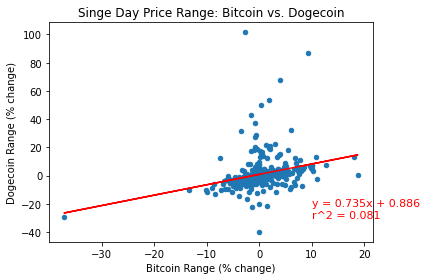

In [60]:
import scipy.stats as st

# Calculate the correlation coefficient and linear regression model 

btc = df_combined_prices['Percent_Change_btc']
doge = df_combined_prices['Percent_Change_doge']

# calculate and plot the regression line on the scatter plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(btc, doge)
regress_values = btc * slope + intercept
regress_eq = (f'''y = {str(round(slope, 3))}x + {str(round(intercept, 3))}
r^2 = {round(rvalue**2,3)}''')

# format plot
fig, ax = plt.subplots()
df_combined_prices.plot(kind='scatter', 
                             ax=ax, 
                             x='Percent_Change_btc', 
                             y='Percent_Change_doge'
                            )

# plot trend linear regression line and annotate

ax.plot(btc, regress_values, color = 'r')
ax.annotate(regress_eq, (10,-30), color = 'r', fontsize=11)

ax.set(title='Singe Day Price Range: Bitcoin vs. Dogecoin',
       xlabel = 'Bitcoin Range (% change)',
       ylabel = 'Dogecoin Range (% change)'
       )

fig.tight_layout();

# calculate and print the correlation

correlation = st.pearsonr(btc, doge)

print(f'The correlation is {round(correlation[0], 2)} with R-square value of {round(rvalue**2,3)}')

In [47]:
df_doge_price_reddit = df_doge.join(df_reddit_doge_summary, how='inner')

df_doge_price_reddit['submissions'].min()

63

The correlation is 0.25 with R-square value of 0.06


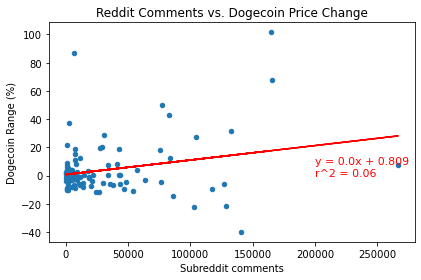

In [61]:
import scipy.stats as st

# Calculate the correlation coefficient and linear regression model 

comments = df_doge_price_reddit['comments']
doge = df_doge_price_reddit['Percent_Change']

# calculate and plot the regression line on the scatter plot

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(comments, doge)
regress_values = comments * slope + intercept
regress_eq = (f'''y = {str(round(slope, 3))}x + {str(round(intercept, 3))}
r^2 = {round(rvalue**2,3)}''')

# format plot
fig, ax = plt.subplots()
df_doge_price_reddit.plot(kind='scatter', 
                 ax=ax, 
                 x='comments', 
                 y='Percent_Change'
                )

# plot trend linear regression line and annotate

ax.plot(comments, regress_values, color = 'r')
ax.annotate(regress_eq, (200000,-0.05), color = 'r', fontsize=11)

ax.set(title='Reddit Comments vs. Dogecoin Price Change',
       xlabel = 'Subreddit comments',
       ylabel = 'Dogecoin Range (%)'
       )

fig.tight_layout();

# calculate and print the correlation

correlation = st.pearsonr(comments, doge)

print(f'The correlation is {round(correlation[0], 2)} with R-square value of {round(rvalue**2,3)}')

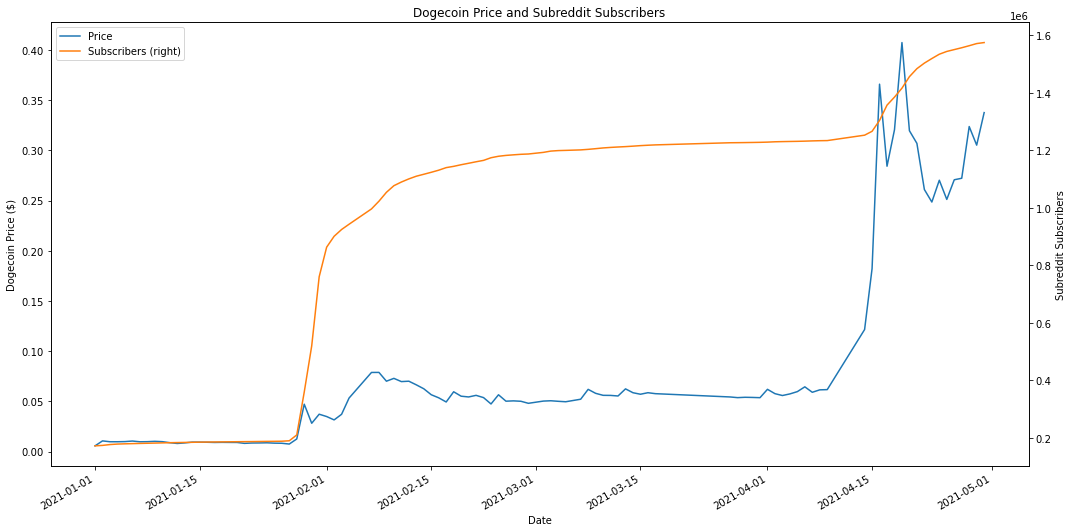

In [98]:
fig, ax = plt.subplots(figsize=(15,7.5))
ax1 = df_doge_price_reddit['Close'].plot(ax=ax, legend=True, label='Price', logy=False)
ax2 = df_doge_price_reddit['subscribers'].plot(ax=ax, secondary_y=True, legend=True, label='Subscribers', logy=False)
ax.set(title='Dogecoin Price and Subreddit Subscribers',
       xlabel = 'Date'
       )
ax1.set_ylabel('Dogecoin Price ($)')
ax2.set_ylabel('Subreddit Subscribers')
fig.tight_layout();

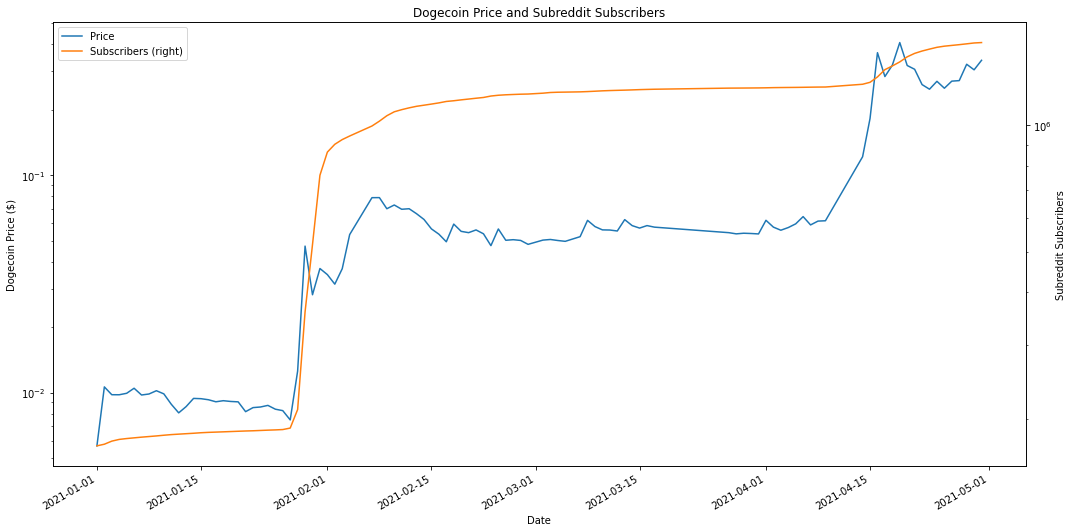

In [99]:
fig, ax = plt.subplots(figsize=(15,7.5))
ax1 = df_doge_price_reddit['Close'].plot(ax=ax, legend=True, label='Price', logy=True)
ax2 = df_doge_price_reddit['subscribers'].plot(ax=ax, secondary_y=True, legend=True, label='Subscribers', logy=True)
ax.set(title='Dogecoin Price and Subreddit Subscribers',
       xlabel = 'Date'
       )
ax1.set_ylabel('Dogecoin Price ($)')
ax2.set_ylabel('Subreddit Subscribers')
fig.tight_layout();